In [1]:
import sys
import hashlib
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
sys.path.append("..")

from itertools import product

from opdynamics.simulation.simulation import initialize_model
from opdynamics.utils.model_modification import modify_model
from opdynamics.utils.types import Parameters
from opdynamics.utils.tools import get_mean_stats, get_path, make_dict, validate_params, count_runs

In [62]:
curve_epsilon = {}

In [63]:
for e, n in [(1e-4, 4), (1e-5, 5), (1e-6, 6), (1e-7, 7), (1e-8, 8), (1e-9, 9), (1e-10, 10)]:
    param_list = {
        "graph_type": ["barabasi"],
        "network_size": [500],
        "memory_size": [256],
        "code_length": [5],
        "kappa": [0, 15, 30],
        "lambd": [0],
        "alpha": [0],
        "omega": [0],
        "gamma": [0],
        "preferential_attachment": [2],
        "polarization_grouping_type": [0],
        "T": [500],
        "num_repetitions": [1000],
        "early_stop": [True],
        "epsilon": [e],
        "results_path": [f"results/epsilon_{n}/"]
    }

    experiments_path = f"../results/epsilon_{n}"

    mean_stats = get_mean_stats(param_list, experiments_path, 500)
    curve_epsilon[e] = mean_stats

In [60]:
counts = {}
for e, n in [(1e-4, 4), (1e-5, 5), (1e-6, 6), (1e-7, 7), (1e-8, 8), (1e-9, 9), (1e-10, 10)]:
    param_list = {
        "graph_type": ["barabasi"],
        "network_size": [500],
        "memory_size": [256],
        "code_length": [5],
        "kappa": [0, 15, 30],
        "lambd": [0],
        "alpha": [0],
        "omega": [0],
        "gamma": [0],
        "preferential_attachment": [2],
        "polarization_grouping_type": [0],
        "T": [500],
        "num_repetitions": [1000],
        "early_stop": [True],
        "epsilon": [e],
        "results_path": [f"results/epsilon_{n}/"]
    }
    experiments_path = f"../results/epsilon_{n}"

    counts[e] = count_runs(param_list, experiments_path)

In [10]:
params = list(product(*param_list.values()))
params = [x[:-5] for x in params]

In [12]:
epsilons = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

count_per_param = {}
for param in params:
    epsin_runs = []
    for e in epsilons:
        epsin_runs.append((e, counts[e][param]))
    count_per_param[param] = epsin_runs

In [19]:
count_per_param[param]

[(0.0001, 3),
 (1e-05, 3),
 (1e-06, 6),
 (1e-07, 61),
 (1e-08, 96),
 (1e-09, 422),
 (1e-10, 1346)]

In [21]:
[x[0] for x in count_per_param[param]]

[0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]

In [22]:
[x[1] for x in count_per_param[param]]

[3, 3, 6, 61, 96, 422, 1346]

In [39]:
"10^{}".format(10)

'10^10'

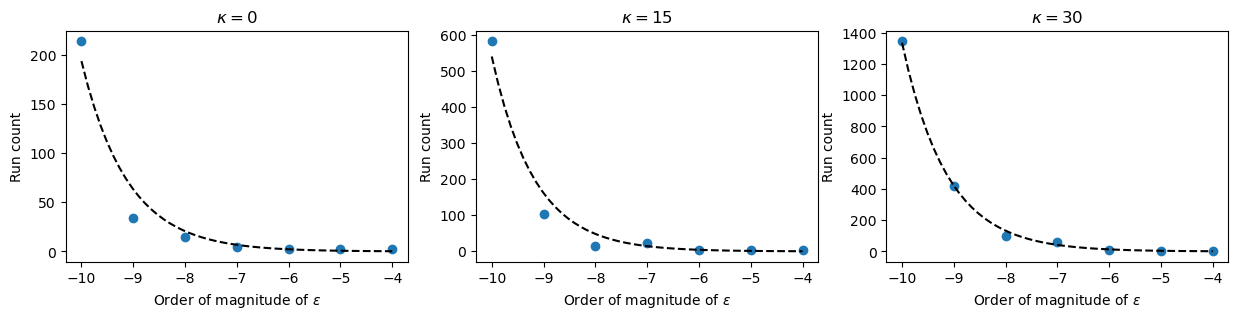

In [58]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 3))

for k, param in enumerate(params):
    x = [-4, -5, -6, -7, -8, -9, -10]
    y = [x[1] for x in count_per_param[param]]
    
    ax[k].scatter(x, y)
    ax[k].set_title(rf"$\kappa = {param[4]}$")
    ax[k].set_xlabel(r"Order of magnitude of $\epsilon$")
    ax[k].set_ylabel("Run count")
    
    p = np.polyfit(x, np.log(y), 1, w = np.sqrt(y))
    a = np.exp(p[1])
    b = p[0]
    x_fitted = np.linspace(np.min(x), np.max(x), 50)
    y_fitted = a * np.exp(b * x_fitted)
    ax[k].plot(x_fitted, y_fitted, 'k--')

In [65]:
a * np.exp(b * (-11))

4242.657018465138

In [8]:
params = list(product(*param_list.values()))
params = [x[:-5] for x in params]

In [9]:
params

[('barabasi', 500, 256, 5, 0, 0, 0, 0, 0, 2, 0),
 ('barabasi', 500, 256, 5, 15, 0, 0, 0, 0, 2, 0),
 ('barabasi', 500, 256, 5, 30, 0, 0, 0, 0, 2, 0)]

0.0001 1e-05 kappa =  0 0.0
1e-05 1e-06 kappa =  0 1.7002203441757546e-06
1e-06 1e-07 kappa =  0 6.089127746597696e-07
1e-07 1e-08 kappa =  0 3.0640064031530366e-07
1e-08 1e-09 kappa =  0 2.034619542541223e-06
1e-09 1e-10 kappa =  0 1.9963487873623525e-06


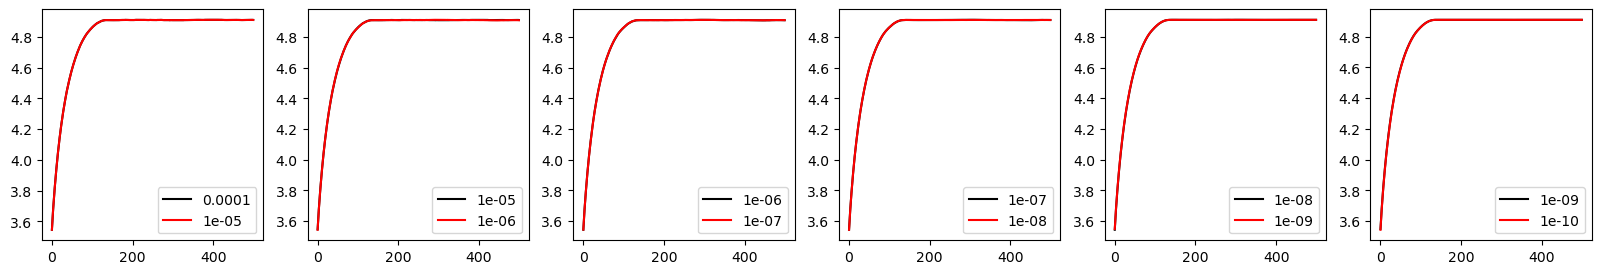

In [15]:
param = params[0]

fig, ax = plt.subplots(ncols = 6, figsize = (20, 3))

for k, (e1, e2) in enumerate(zip(epsilons[:-1], epsilons[1:])):
    c1 = curve_epsilon[e1][param]["Entropy"]
    c2 = curve_epsilon[e2][param]["Entropy"]
    error = ((c2 - c1)**2).mean()
    
    ax[k].plot(range(len(c1)), c1, c = 'k', label = e1)
    ax[k].plot(range(len(c1)), c2, c = 'r', label = e2)
    ax[k].set_xlabel = "time"
    ax[k].set_ylabel = "Entropy"
    ax[k].set_title = f"Kappa = {param[4]}" + " ; "+ f"Error: {error}"
    
    print(e1, e2, "kappa = ", param[4], error)
    
    ax[k].legend()

0.0001 1e-05 kappa =  15 0.0
1e-05 1e-06 kappa =  15 5.50964702406448e-05
1e-06 1e-07 kappa =  15 6.15275107571073e-06
1e-07 1e-08 kappa =  15 4.4184474501362926e-06
1e-08 1e-09 kappa =  15 3.816168454230707e-06
1e-09 1e-10 kappa =  15 8.154356140964869e-06


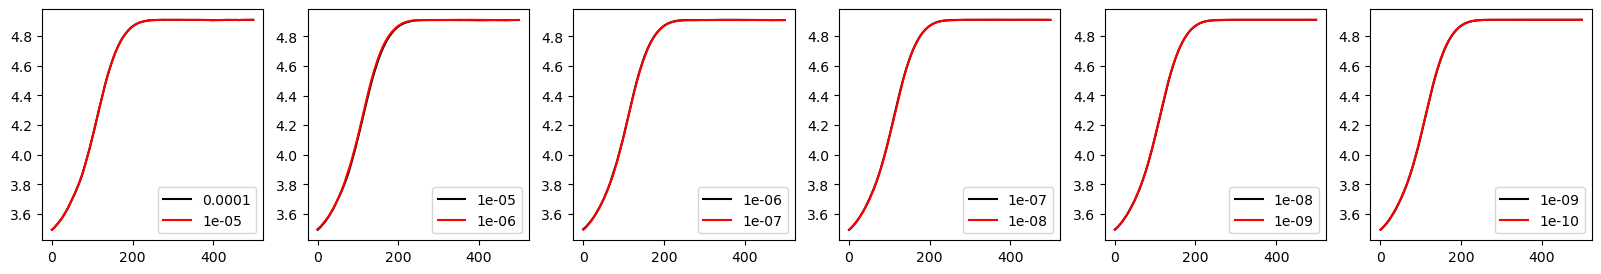

In [16]:
param = params[1]

fig, ax = plt.subplots(ncols = 6, figsize = (20, 3))

for k, (e1, e2) in enumerate(zip(epsilons[:-1], epsilons[1:])):
    c1 = curve_epsilon[e1][param]["Entropy"]
    c2 = curve_epsilon[e2][param]["Entropy"]
    error = ((c2 - c1)**2).mean()
    
    ax[k].plot(range(len(c1)), c1, c = 'k', label = e1)
    ax[k].plot(range(len(c1)), c2, c = 'r', label = e2)
    ax[k].set_xlabel = "time"
    ax[k].set_ylabel = "Entropy"
    ax[k].set_title = f"Kappa = {param[4]}" + " ; "+ f"Error: {error}"
    
    print(e1, e2, "kappa = ", param[4], error)
    
    ax[k].legend()

0.0001 1e-05 kappa =  30 0.0
1e-05 1e-06 kappa =  30 7.846983529669825e-08
1e-06 1e-07 kappa =  30 1.5092123694496585e-07
1e-07 1e-08 kappa =  30 1.1872228121192442e-07
1e-08 1e-09 kappa =  30 1.2565641592878886e-08
1e-09 1e-10 kappa =  30 6.261878740523327e-10


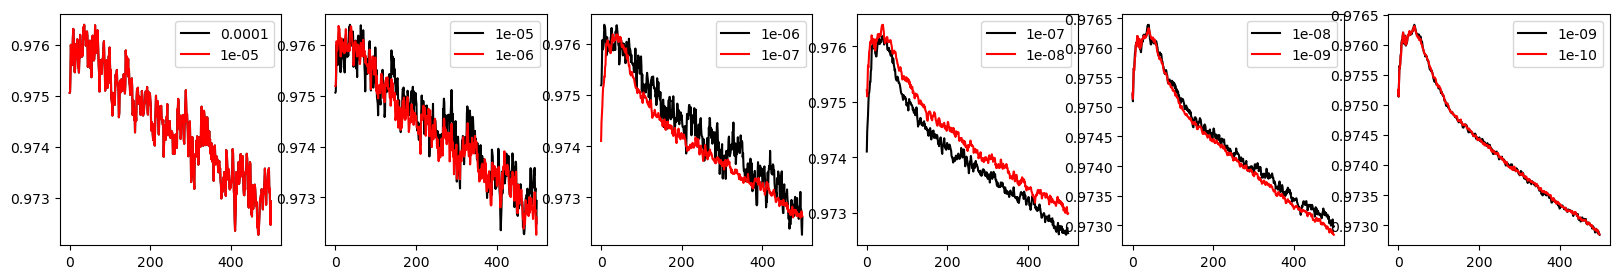

In [64]:
param = params[2]

fig, ax = plt.subplots(ncols = 6, figsize = (20, 3))
measure = "Proximity"
for k, (e1, e2) in enumerate(zip(epsilons[:-1], epsilons[1:])):
    c1 = curve_epsilon[e1][param][measure]
    c2 = curve_epsilon[e2][param][measure]
    error = ((c2 - c1)**2).mean()
    
    ax[k].plot(range(len(c1)), c1, c = 'k', label = e1)
    ax[k].plot(range(len(c1)), c2, c = 'r', label = e2)
    ax[k].set_xlabel = "time"
    ax[k].set_ylabel = measure
    ax[k].set_title = f"Kappa = {param[4]}" + " ; "+ f"Error: {error}"
    
    print(e1, e2, "kappa = ", param[4], error)
    
    ax[k].legend()